# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://github.com/UBC-CS/cpsc330-2022W2/tree/main/lectures) 

**Due date: Monday Jan 23, 2023 at 11:59pm**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are allowed to work and submit in pairs in this homework assignment. 

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index. **Note:** you may need to change the name of the file if it does not match the download.

In [2]:
spotify_df = pd.read_csv("./spotify.csv", index_col = 0)

Excluding the target, how many columns (potential features) does the dataset include?

Answer: 15

#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)

Answer: 1613 training and 404 test examples 

#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the largest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [4]:
df_train_descr = df_train.describe()
#ranges = df_train_descr.loc["max"].subtract(df_train_descr.loc["min"])
#ranges.index[ranges.argmax()]
df_train_descr

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1.613000e+03,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185067,0.620076,2.462533e+05,0.681315,0.134317,5.384377,0.191317,-7.095272,0.619343,0.092119,121.310311,3.975201,0.495891,0.512089
std,0.255838,0.161152,8.056740e+04,0.206964,0.274217,3.653722,0.156071,3.678993,0.485699,0.088007,26.431574,0.247829,0.244267,0.500009
min,0.000003,0.148000,1.604200e+04,0.015600,0.000000,0.000000,0.018800,-31.082000,0.000000,0.023100,47.859000,1.000000,0.037300,0.000000
25%,0.010000,0.514000,1.999040e+05,0.564000,0.000000,2.000000,0.092200,-8.388000,0.000000,0.037500,100.221000,4.000000,0.298000,0.000000
50%,0.062600,0.634000,2.298590e+05,0.712000,0.000088,6.000000,0.125000,-6.298000,1.000000,0.055300,121.241000,4.000000,0.492000,1.000000
75%,0.260000,0.739000,2.703330e+05,0.841000,0.055900,9.000000,0.250000,-4.833000,1.000000,0.107000,136.894000,4.000000,0.689000,1.000000
max,0.994000,0.984000,1.004627e+06,0.997000,0.976000,11.000000,0.969000,-0.718000,1.000000,0.622000,219.331000,5.000000,0.974000,1.000000


Answer: 'duration_ms' has the largest range

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">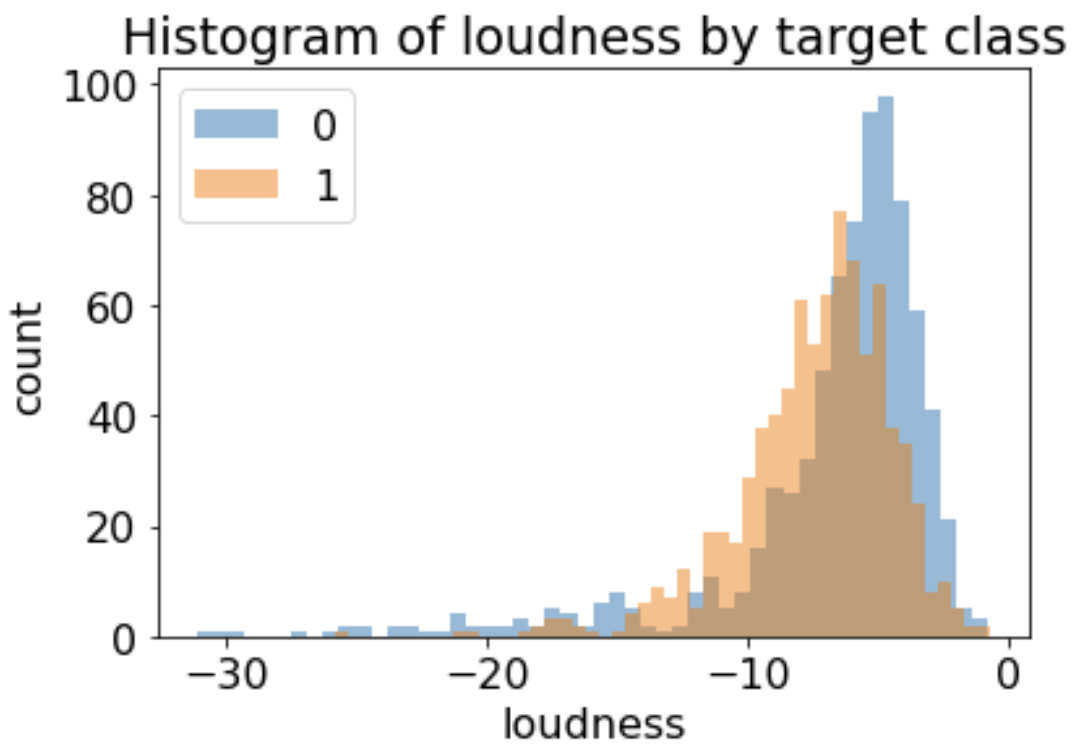

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of the loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [5]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

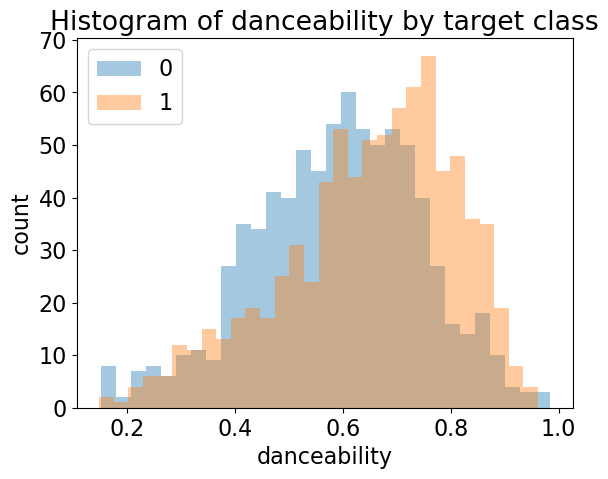

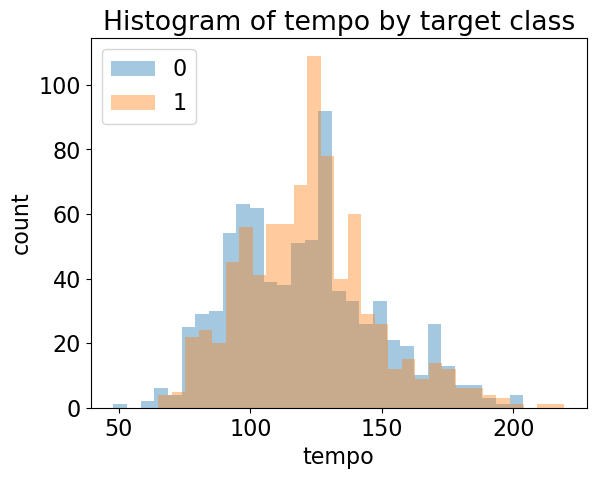

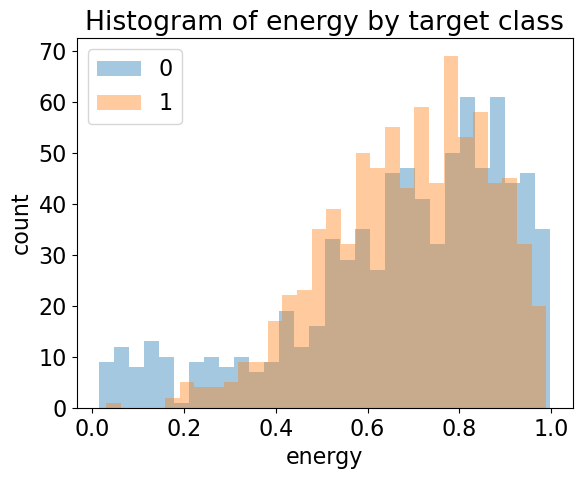

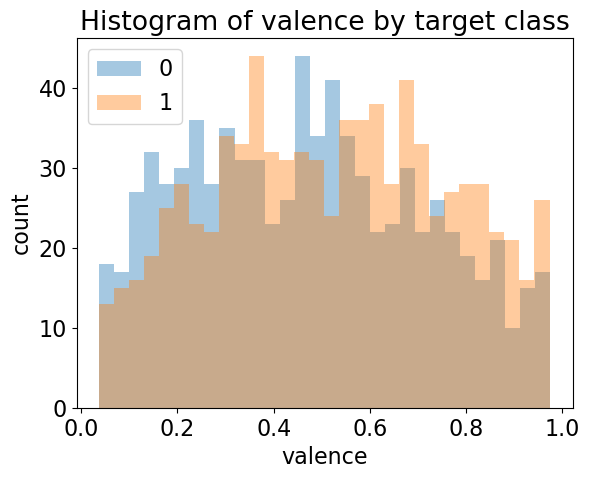

In [6]:

hist_features = ["danceability", "tempo", "energy", "valence"]
for x in hist_features:
    plt.hist(negative_examples[x],bins = 30, alpha = 0.4, label = "0")
    plt.hist(positive_examples[x], bins = 30, alpha = 0.4, label = "1")
    plt.xlabel(x)
    plt.ylabel("count")
    plt.legend(loc='upper left')
    plt.title("Histogram of "+x+ " by target class")
    plt.show()


#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

Answer: A reasonable split would be to predict 0 if danceability < 0.6 (and predict 1 otherwise).

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



Answer: yes. If the distribution is the same for both target classes, the feature cannot be used to tell which class an example is more likely to belong to.

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [7]:
df_train[["song_title", "artist"]].head()

,song_title,artist
260,WTF (Where They From) [feat. Pharrell Williams],Missy Elliott
1286,"10,000 Reasons (Bless the Lord) [Radio Version]",Matt Redman
1344,American Dream,Chelsea Grin
1197,Feel This Moment,Pitbull
119,Trap Queen,Fetty Wap


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

Answer:
* Yes - e.g. some artists may be more consistently liked than others; or song titles being shorter 
    may be correlated with them being liked more.
* Yes. For the artist, it may be hard to find patterns if e.g. most artist have only one or a few songs each in the dataset. For the song title, it may have to be transformed into e.g. song title length to be used in the model.

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [8]:
#Create X_train and y_train and X_test and y_test from df_train and df_test above. 
#Skip the song_title and artist features for now.
X_train = df_train.drop(columns = ['target', 'song_title', 'artist'])
y_train = df_train[['target']]
X_test = df_test.drop(columns = ['target','song_title', 'artist'])
y_test = df_test[['target']]

#Fit a DecisionTreeClassifier on the train set.
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the tenth example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the tenth example with `X_train.iloc[[9]]`.

In [9]:
model.predict(X_train.iloc[[9]])

array([1], dtype=int64)

In [10]:
y_train.iloc[[9]]

,target
26,1


Answer: yes, the prediction is correct.

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [11]:
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
#cv_scores
cv_scores.mean()

0.6801587301587301

#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [12]:
cv_train_scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
#pd.DataFrame(cv_train_scores)
#pd.DataFrame({'cross_validate':cv_train_scores['test_score'], 'cross_val_scores':cv_scores})
print("Cross-val score:", cv_train_scores['test_score'].mean())
print("Training score:", cv_train_scores['train_score'].mean())

Cross-val score: 0.6919292999003144
Training score: 0.9988978817686291


Answer: it is not exactly the same, but it is similar. The difference may be due to randomness of the cross-validation splits leading to slightly different results. 

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

Answer: The training score is much higher than the cross-validation score, implying that the model is overfitting. This might be because the height of the tree has not been restricted. 

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

Answer: The scores vary a fair amount, with a range of about 10-15%. This may be due to different distributions of samples in each random split. As this variation is random,the overall cross validation score can average across the different scores and arrive at a convergent value as the number of splits get higher, and therefore will be trustworthy when the number of splits is not too low.

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [13]:
#- Explore the max_depth hyperparameter. Run 10-fold cross-validation for trees 
#  with different values of max_depth (at least 10 different values in the range 1 to 25).
#- For each max_depth, get both the train accuracy and the cross-validation accuracy.

#Code below adapted from lecture 3

train_scores = []
cross_val_scores =[]
depths = [1,3,5,7,10,13,16,20,23,25]

for md in depths:
    model = DecisionTreeClassifier(max_depth = md)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    train_scores.append(np.mean(scores["train_score"]))
    cross_val_scores.append(np.mean(scores["test_score"]))
    print("max_depth:", md)
    print("Train accuracy:   %0.3f" % (np.mean(scores["train_score"])))
    print("Cross-val accuracy:   %0.3f" % (np.mean(scores["test_score"])))
    print("  ")

max_depth: 1
Train accuracy:   0.646
Cross-val accuracy:   0.641
  
max_depth: 3
Train accuracy:   0.732
Cross-val accuracy:   0.710
  
max_depth: 5
Train accuracy:   0.793
Cross-val accuracy:   0.711
  
max_depth: 7
Train accuracy:   0.858
Cross-val accuracy:   0.712
  
max_depth: 10
Train accuracy:   0.937
Cross-val accuracy:   0.706
  
max_depth: 13
Train accuracy:   0.982
Cross-val accuracy:   0.690
  
max_depth: 16
Train accuracy:   0.995
Cross-val accuracy:   0.695
  
max_depth: 20
Train accuracy:   0.999
Cross-val accuracy:   0.684
  
max_depth: 23
Train accuracy:   0.999
Cross-val accuracy:   0.693
  
max_depth: 25
Train accuracy:   0.999
Cross-val accuracy:   0.688
  


Text(0.5, 1.0, 'Change in accuracy of train and validation predictions with max depth of tree')

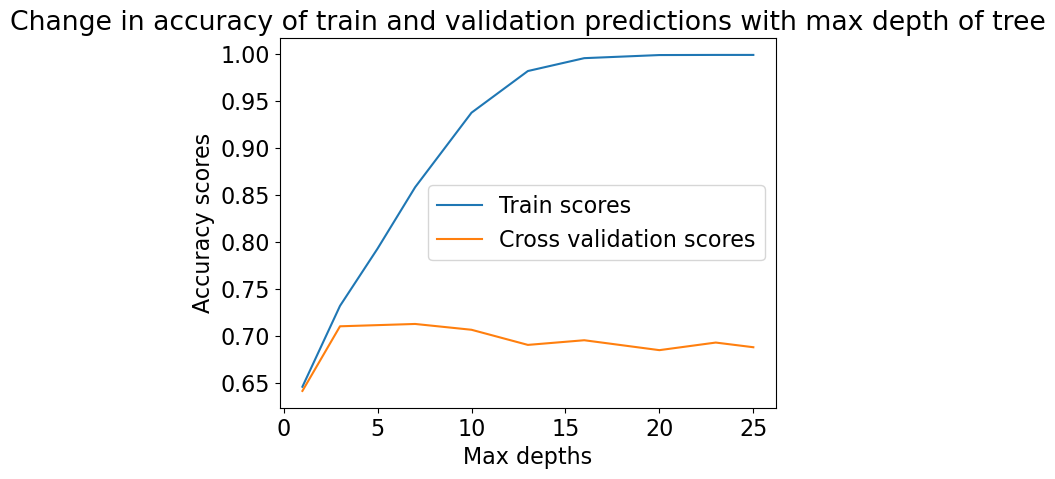

In [14]:
#- Make a plot with max_depth on the x-axis and the train and cross-validation scores on the y-axis.
#  That is, your plot should have two curves, one for train and one for cross-validation. 
#  Include a legend to specify which is which.

plt.plot(depths, train_scores, label = "Train scores")
plt.plot(depths, cross_val_scores, label = "Cross validation scores")
plt.legend()
plt.xlabel("Max depths")
plt.ylabel("Accuracy scores")
plt.title("Change in accuracy of train and validation predictions with max depth of tree")

*Discuss how changing the max_depth hyperparameter affects the training and cross-validation accuracy. 
From these results, what depth would you pick as the optimal depth?* 

Answer: Increasing max_depth from 1 to 3 led to an improvement in both train and validation accuracy, but beyond that train accuracy improved while validation accuracy fell. This implies there was underfitting at max_depth = 1, but overfitting at max_depth > 3. Therefore I would choose max_depth = 3 as the optimal depth. 

*Do you think that the depth you chose would generalize to other "spotify" datasets 
(i.e., data on other spotify users)?*

This depth implies that there were only three or less 'partitions' of the data that would need to be made to bin a sample into one of the two possible predictions. As the above graph shows the max_depth = 3 is not large enough to lead to overfitting, then if the users from the new dataset did not differ too much from the ones in this dataset (similar time of data collection, location etc.) then this depth could likely generalise to them. However if the users were different (e.g. more mature, from a different area or time) then possibly they would be more complex in their preferences and need more 'partitions' or depth. They could also be simpler in their preferences and need less depth in the tree. 


## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [15]:
final_model = DecisionTreeClassifier(max_depth = 3)
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

0.6683168316831684

The test score is quite a bit lower than the mean cross-validation score, but it is within the range between the lowest and highest cross-validation scores for each split for max_depth = 3. This may imply that the test data did not have the exact same distribution of data as the training data, and so the model failed to generalise well; another random split may help get a more representational test sample. This shows that this model may not generalise well if the test data does not have the same distributions as the training data.

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\-1\\-1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

Answers:
1. Most features that fit this condition have target class '-1', and so if "true" the example would be predicted to be in the '-1' group. Similarly, if "false" the example would be predicted to be '+1'. 
2. It would classify 5/6 correctly, so the training accuracy would be 83.3%.
3. Yes, e.g. by setting the split to be on the first feature being equal to 9. If true, the example would be classified as 1, and -1 otherwise.

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 